In [1]:
import os

tif_directory = "C:/Users/KRIDAY PARMAR/Downloads/prospace_assignment/prospace_assignment"

tif_files = [file for file in os.listdir(tif_directory) if file.endswith('.tif')]

num_tif_images = len(tif_files)

print("Number of TIF images:", num_tif_images)


Number of TIF images: 6816


In [ ]:
import rasterio

def count_pixels(file_path):
    with rasterio.open(file_path) as src:
        rows, cols = src.shape
        num_pixels = rows * cols
    return num_pixels

# Directory containing your TIF files
tif_directory = "C:/Users/KRIDAY PARMAR/Downloads/prospace_assignment/prospace_assignment"

tif_files = [os.path.join(tif_directory, file) for file in os.listdir(tif_directory) if file.endswith('.tif')]

pixels_per_file = {file: count_pixels(file) for file in tif_files}

for file, num_pixels in pixels_per_file.items():
    print(f"{file}: {num_pixels} pixels")


In [9]:
import os
import numpy as np
import cv2
import rasterio
from sklearn.model_selection import train_test_split
    import tensorflow as tf
    from tensorflow.keras import layers, models


def read_tif_image(file_path):
    with rasterio.open(file_path) as src:
        # Read each band separately
        bands = [src.read(band_idx) for band_idx in range(1, src.count + 1)]
    return bands

def preprocess_image(image, target_size):
    resized_image = cv2.resize(image, target_size)
    resized_image = resized_image / 255.0
    return resized_image


tif_directory = "C:/Users/KRIDAY PARMAR/Downloads/prospace_assignment/prospace_assignment"


tif_files = [os.path.join(tif_directory, file) for file in os.listdir(tif_directory) if file.endswith('.tif')]

images = [read_tif_image(file) for file in tif_files]
target_size = (20, 20)  # Target size for resizing

# Resize each band and stack them to form a single image
resized_images = []
for image in images:
    resized_bands = [preprocess_image(band, target_size) for band in image]
    resized_image = np.stack(resized_bands, axis=-1)  # Stack bands along the last dimension
    resized_images.append(resized_image)

# Convert the list of resized images to a numpy array
resized_images = np.array(resized_images)

# Define the CNN model
def create_cnn_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu')
    ])
    return model

input_shape = (target_size[0], target_size[1], resized_images.shape[3])  

# Create the CNN model
model = create_cnn_model(input_shape)
model.summary()
 
# Extract features from each image
feature_vectors = []
for image in resized_images:
    features = model.predict(np.expand_dims(image, axis=0))
    features = features.flatten()
    feature_vectors.append(features)


feature_vectors = np.array(feature_vectors)

print("Shape of feature vectors:", feature_vectors.shape)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 18, 18, 32)        1184      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 9, 9, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 3, 3, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 64)               

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 31ms/step
Shape of feature vectors: (6816, 64)


In [10]:
from sklearn.cluster import KMeans


num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(feature_vectors)

C:\Users\Public\KP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
file_cluster_mapping = dict(zip(tif_files, cluster_labels))

for tif_file, cluster_label in file_cluster_mapping.items():
    print(f"TIF File: {tif_file} | Cluster Label: {cluster_label}")

TIF File: C:/Users/KRIDAY PARMAR/Downloads/prospace_assignment/prospace_assignment\100_2022_10.tif | Cluster Label: 1
TIF File: C:/Users/KRIDAY PARMAR/Downloads/prospace_assignment/prospace_assignment\100_2022_11.tif | Cluster Label: 1
TIF File: C:/Users/KRIDAY PARMAR/Downloads/prospace_assignment/prospace_assignment\100_2022_4.tif | Cluster Label: 1
TIF File: C:/Users/KRIDAY PARMAR/Downloads/prospace_assignment/prospace_assignment\100_2022_5.tif | Cluster Label: 1
TIF File: C:/Users/KRIDAY PARMAR/Downloads/prospace_assignment/prospace_assignment\100_2022_6.tif | Cluster Label: 1
TIF File: C:/Users/KRIDAY PARMAR/Downloads/prospace_assignment/prospace_assignment\100_2022_7.tif | Cluster Label: 1
TIF File: C:/Users/KRIDAY PARMAR/Downloads/prospace_assignment/prospace_assignment\100_2022_8.tif | Cluster Label: 1
TIF File: C:/Users/KRIDAY PARMAR/Downloads/prospace_assignment/prospace_assignment\100_2022_9.tif | Cluster Label: 1
TIF File: C:/Users/KRIDAY PARMAR/Downloads/prospace_assignment

In [12]:
resized_images.shape

(6816, 20, 20, 4)

In [13]:
from collections import Counter
cluster_counts = Counter(cluster_labels)
for cluster_label, count in cluster_counts.items():
    print(f"Cluster {cluster_label }: {count} points")


Cluster 1: 3814 points
Cluster 0: 2878 points
Cluster 2: 124 points


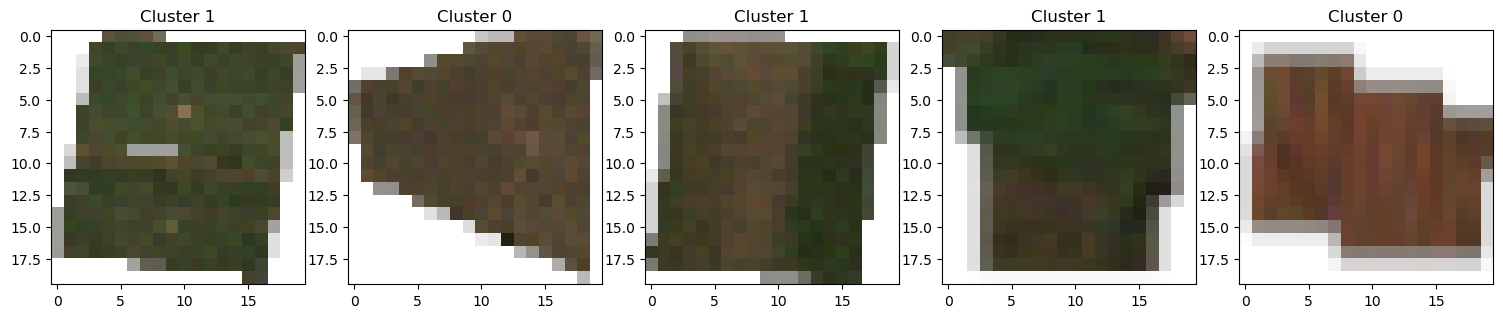

In [43]:
import random
import matplotlib.pyplot as plt

random_indices = random.sample(range(len(tif_files)), 5)  
random_images = [resized_images[i] for i in random_indices]
random_cluster_labels = [cluster_labels[i] for i in random_indices]


fig, axes = plt.subplots(nrows=1, ncols=len(random_images), figsize=(15, 5))

for i, (image, cluster_label) in enumerate(zip(random_images, random_cluster_labels)):
    axes[i].imshow(image)
    axes[i].set_title(f'Cluster {cluster_label }')

plt.tight_layout()
plt.show()


Cluster 0- Growing 


Cluster 1- Lush Green Field

Cluster 2- Barren Land


In [16]:
model.save("prospace.h5")

C:\Users\Public\KP\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
import pickle
with open("cluster.pkl", "wb") as f:
    pickle.dump(cluster_labels, f)